<link rel="stylesheet" href="https://use.fontawesome.com/releases/v5.6.3/css/all.css" integrity="sha384-UHRtZLI+pbxtHCWp1t77Bi1L4ZtiqrqD80Kn4Z8NTSRyMA2Fd33n5dQ8lWUE00s/" crossorigin="anonymous">

<a href="https://rega.kuleuven.be/cev/viralmetagenomics" target="_blank"><img  align="right" src="https://rega.kuleuven.be/cev/viralmetagenomics/pictures/lovm/image_preview" height="7.5%" width="7.5%" /></a>

# JM-lab bioinformatics pipeline
<hr>

This jupyter notebook gives an overview of the commands needed for the primary analysis of raw NGS data, flavoured with explanations and neat tips and tricks. This is intended as a learning tool for new PhD-students, master students, labrotations, interns, etc. Basic command-line knowledge is required to be able to complete this tutorial, a Linux introduction course like <a href="https://ryanstutorials.net/linuxtutorial/" target="_blank">this one</a> should suffice.

For this tutorial, we will work on the [gbiomed teaching server](#1.1-Logging-into-the-teaching-server). Further, you can run the commands directly from the terminal or within this jupyter notebook. To run a jupyter notebook on the teaching server, copy it to your `~/data/jupyternotebooks/` folder and open an internet browser to navigate to [bmw.gbiomed.kuleuven.be](https://bmw.gbiomed.kuleuven.be/), log in with your KU Leuven credentials which should finally allow you to run the notebook. You can find more information on how to transfer files to a remote server [below](#1.2-Installing-an-SFTP-client).

<center><img src="https://assets.researchsquare.com/files/nprot-4839/v1/figure_2.jpg"></center>

<center><img src="https://i.pinimg.com/originals/7f/6e/0c/7f6e0c5ba45905abbf9969a4a440ceba.gif" height="50%" width="50%"></center>

#### Requirements:

* Internet connection
* KU Leuven credentials
* Basic Linux command-line knowledge
* Local copy of the <a href="https://github.com/Matthijnssenslab" target="_blank">Github repository</a> with this jupyter notebook, solutions notebook, extra content, etc.
* NetoVIR FASTQ-files (named <em>metatoy.&ast;.fastq.gz</em>)
* Bioinformatics mood

#### Overview:

* [Part 1: Preparation](#Part-1:-Preparation)
* [Part 2: Pipeline](#Part-2:-Virome-pipeline)
    * [Basic NGS commands](#Basic-commands-when-working-with-NGS-data)
    * [Trimming and QC](#2.1-Trimming-and-QC)
    * [Removing contamination](#2.2-Removing-contamination)
    * [Assembly](#2.3-Assembly)
    * [Taxonomical annotation](#2.4-Taxonomical-annotation)
    * [Visualization](#2.5-Visualization)
* <a href="#part-3-exercise-">Part 3: Exercise!</a>
---

## **Part 1: Preparation**
### 1.1 Logging into the teaching server

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 10px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <div style="color:black">
<p>To be able to perform analysis on a Linux machine or a server, a connection needs to be made through the shell of the operating system. Through this shell we can use the command-line interface to execute tasks.</p>
<p>For this tutorial, we can work on the teaching server of gbiomed (bmw.gbiomed.kuleuven.be). Everyone with a u- or r-number from KU Leuven can connect to this remote server by using <code>ssh</code> (<a target="_blank" href="https://searchsecurity.techtarget.com/definition/Secure-Shell">more info</a>) with your KU Leuven credentials.</p>
<p>MacOS and Linux users can already proceed to the next step as these operating systems already have a terminal and <code>ssh</code> natively installed. </p>
<p>Windows users on the other hand, will have to install an SSH client (<a target="_blank" href="https://www.chiark.greenend.org.uk/~sgtatham/putty/latest.html">PuTTY</a> or <a target="_blank" href="https://www.bitvise.com/ssh-client-download">Bitvise</a>) or a Linux subsytem for Windows and a terminal app (eg. Ubuntu app). The latter is preferred because it is already a part of Windows and subsequently the next steps will be the same as for Linux and Mac users. Instructions on how to install the Ubuntu terminal app on Windows can be found <a target="_blank" href="https://ubuntu.com/tutorials/ubuntu-on-windows#1-overview">here</a>, be aware that this requires at least a x86 PC running Windows 10 (Fall Creators update Oct 2017).</p></div></div>

**Perform following actions in a terminal (command-line interface):**

In [ ]:
ssh uXXXXXXX@bmw.gbiomed.kuleuven.be

>Replace uXXXXXXX with your own u- or r-number.
        
Next, you should give your password connected to your KU Leuven account and you're in!

<div class="alert alert-block alert-warning" style="color:orange;background-color: white; border: 2px solid; padding: 10px;display:inline-block">
    <b><i class="fa fa-exclamation-triangle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
<b>You will log in to the <code>home</code> directory, but always avoid working in here as this has limited storage and will cause trouble when it&#39;s full!</b> Therefore, on the teaching server, work in the <code>data</code> directory, which is a symbolic link to <code>/mnt/storage/uXXXXXXX</code>. Here, you will have enough space to store raw data, results and temporary files.</p></div>

# File transfer

### 1.2 Installing an SFTP client

In order to transfer files from your local computer to a remote server you need an SFTP (Secure File Transfer Protocol) client, a commonly used SFTP client is <a href="https://filezilla-project.org/" target="_blank">FileZilla</a>. You can download and install it through the FileZilla project website.

>**Sidenote:** <br> *Bitvise is an SSH and SFTP client in one, so if you're using Bitvise there is no need to install FileZilla.*

Once you installed and opened FileZilla, it should look like this:

<center><img src="https://github.com/Matthijnssenslab/tutorial_images/blob/main/Filezilla_start.png?raw=true" height="70%" width="70%" style="left" /></center>
<br>
On top of the program you can fill out the host (bmw.gbiomed.kuleuven.be), your u/r-number and password connected to KU Leuven and <b>set the port to 22</b> (see image above).

Once you click connect, you should be able to transfer files from your computer to the remote server simply by dragging them one or the other way.

<br>
<center><img src="https://github.com/Matthijnssenslab/tutorial_images/blob/main/Filezilla_transfer.png?raw=true" height="70%" width="70%" style="left" /></center>

<div class="alert alert-block alert-warning" style="color:orange;background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-exclamation-triangle" aria-hidden="true"></i>&nbsp; Important</b><br>
    <p style="color: black">
        FileZilla will connect to your <code>home</code> directory by default, but do not copy files here! Instead, copy them to the <code>data</code> directory.</p>
</div>

#### 1.2.1 Transfer files
From the terminal, make a new directory in your data folder and transfer all provided files (FASTQ files, file containing WTA and Nextera primers, contaminome, etc.) to this directory with FileZilla.

In [ ]:
mkdir ~/data/meta_tutorial

# Software installation

### 1.3 Installing all necessary software on the remote server
#### 1.3.1 Miniconda
**Miniconda** is a package manager from which you can install a lot of (bioinformatics) software. More info on conda can be found <a href="https://docs.conda.io/projects/conda/en/latest/" target="_blank">here</a>.

##### Installing Miniconda:
1. Create in your datafolder a new `software` directory and move into that directory:

In [ ]:
cd ~/data
mkdir software
cd software

2. Download the Miniconda installer with `wget`. Next, run the installation script (see command-line options below). When Miniconda is installed, activate conda by sourcing the initialization script, this simply sets a couple of shell environment variables, and `conda` command as a shell function. More information in the <a href="https://docs.conda.io/projects/conda/en/latest/user-guide/install/index.html" target="_blank">installer guidelines</a>.

In [ ]:
wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh

bash Miniconda3-latest-Linux-x86_64.sh -b -p $HOME/data/software/miniconda

<div class="alert alert-block dark-alert" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-laptop"></i>&nbsp; Command-line options</b><br>
<ul style="color:black">
    <li><code>-b</code> makes the installation run silent</li>
    <li><code>-p</code> provides the path where to install Miniconda</li>
    </ul></div>

In [ ]:
source $HOME/data/software/miniconda/bin/activate
conda init
source ~/.bashrc

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <p style="color: black">
Notice that <code>&#36;HOME</code> and <code>~/</code>both point to your <code>home</code> directory.</p></div>

##### Installing software with Miniconda:
3. When installing new software with conda, the best practice is to create a new conda environment for each project you are working on, for example:

In this tutorial we will run the virome pipeline, so we will create a conda environment with all software we need to run the pipeline installed in this environment. Then we need to activate this environment to make the software available for use.


In [ ]:
conda create -y --name virome_pipeline python=3.8
conda activate virome_pipeline
conda install -y -c bioconda -c anaconda samtools bwa-mem2 bowtie2 trimmomatic bedtools fastqc pigz seqtk

<div class="alert alert-block dark-alert" style="background-color: white; border: 2px solid; padding: 10px;display:inline-block">
    <b><i class="fa fa-laptop"></i>&nbsp; Command-line options</b><br>
    <ul>
        <li><code>conda create -y --name virome_pipeline python=3.8</code> creates a python environment named <em>virome_pipeline</em>, where we will install all software.</li>
        <li><code>conda activate virome_pipeline</code> activates this environment (you can see the beginning command-line prompt name change from <code>(base)</code> to <code>(virome_pipeline)</code>.</li>
        <li><code>conda install -y -c bioconda -c anaconda ...</code> installs all necessary software from the bioconda and anaconda channels in the activated environment, and solves package dependencies, version incompatibilities, etc. </li>
    </ul>
    </div>

#### 1.3.2 Installing from another source

The Miniconda installation will most of the time lag a few versions behind the most current release. If you really want the most recent version of the software, then you'll need to manually install the software and its dependencies.

Next to Miniconda their are a lot of other possibilities to install software (`pip`, compiling from source, unpacking binaries, installing from github repository, etc.)

#### 1.3.2.1 DIAMOND
As the latest version of <a href="https://github.com/bbuchfink/diamond" target="_blank">DIAMOND</a> (a sequence aligner for protein and translated DNA searches) is not available through `conda`, we can install it from Github by following the <a href="https://github.com/bbuchfink/diamond/wiki" target="_blank">installation instructions</a>.

In [ ]:
cd ~/data/software/
mkdir diamond
cd diamond
wget http://github.com/bbuchfink/diamond/releases/download/v2.0.6/diamond-linux64.tar.gz
tar -xzf diamond-linux64.tar.gz

Now we still need to put the diamond executable in our `PATH` variable so we can call the `diamond` command from everywhere in the command line. This can be done by making a `bin` subdirectory in `~/data/software/`, followed by creating a <a href="https://linuxize.com/post/how-to-create-symbolic-links-in-linux-using-the-ln-command/" target="_blank">symbolic link</a> from the `diamond` executable to `~/data/software/bin/` and finally export this directory to our `$PATH` by adding it to your `.profile` file.

In [ ]:
cd ~/data/software
mkdir bin
cd bin/
ln -s ~/data/software/diamond/diamond .

Next, open the `.profile` file with `nano` (a text editor) and add following line to the bottom of the file:
```bash
PATH="~/data/software/bin:$PATH"
```

In [ ]:
nano ~/.profile

When you `source` your `.profile` file, you should now be able to call `diamond`.

In [ ]:
source ~/.profile

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <p style="color: black">
More documentation on how and where to set the <code>PATH</code> variable in these two topics:</p>
<ul style="color: black">
<li><strong>How</strong>: <a target="_blank" href="https://unix.stackexchange.com/questions/26047/how-to-correctly-add-a-path-to-path">How to correctly add a path to PATH</a></li>
<li><strong>Where</strong>: <a target="_blank" href="https://superuser.com/questions/183870/difference-between-bashrc-and-bash-profile/183980#183980">Difference between .bashrc and .profile files</a></li>
</ul></div>

Let's check out the version of Diamond you have installed!

In [ ]:
diamond version

#### 1.3.2.2 Krona
<p>In the recent past, there were some issues with <a target="_blank" href="https://github.com/marbl/Krona">Krona</a> but they have been solved by the latest releases on Github. Unfortunately these are not yet available through <code>conda</code>, so we will also install them directly from Github.</p>
<p> Clone the Krona repository in your <code>~/data/software</code> directory.</p>

In [ ]:
cd ~/data/software
git clone https://github.com/marbl/Krona.git

<p>This will unpack to <code>Krona/</code>.</p>

<p>Move to <code>Krona/KronaTools/</code> and run the installation script <code>install.pl</code>.

In [ ]:
cd ~/data/software/Krona/KronaTools
./install.pl --prefix ~/data/software

<div class="alert alert-block dark-alert" style="background-color: white; border: 2px solid; padding: 10px;display:inline-block">
    <b><i class="fa fa-laptop"></i>&nbsp; Command-line options</b><br><br>
    <p style="color:black">
        <code>install.pl</code> will install all the Krona scripts into a <code>bin</code> directory within the path you specified with <code>--prefix</code>. We give it <code>~/data/software</code> because we already have a <code>bin</code> directory there which is installed in our <code>PATH</code> variable.
    </p>
</div>

##### Linking the taxonomy database for Krona
Krona is installed but it still needs <b>taxonomy databases</b> to generate taxonomic reports. Normally, you should run the <code>ktUpdateTaxonomy.sh</code> and <code>updateAccessions.sh</code> scripts to download these databases but as we are working on the teaching server with limited storage capability, they are already available under <code>/home/luna.kuleuven.be/u0140985/data/db/Krona/</code>. By creating a symbolic link from this path to the default path where Krona will search for the databases when it is running, we save some storage space.

In [ ]:
ln -sf /mnt/storage/u0140985/db/Krona ~/data/software/Krona/KronaTools/taxonomy

---
<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br>

<h4 id="1-3-1-exercise" style="color: black">1.3-1 Exercise</h4>
<p style="color: black">Try to install the latest version of <a target="_blank" href="https://github.com/ablab/spades">SPAdes</a> by yourself. If you have troubles with this exercise, the steps are listed in the solutions notebook.</p></div>

---
## **Part 2: Virome pipeline**

<div class="alert alert-block alert-success" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-lightbulb-o"></i>&nbsp; Tips</b><br>
    <p style="color: black">
Before we start, some commandments to live by:</p>
<ol style="color: black">
<li><strong>Always make sure you&#39;re working in the right directory</strong> (<code>pwd</code>) and that you <strong>activated the <code>conda</code> environment</strong> you need</li>
<li>Try the <code>-h</code>, <code>-help</code> or <code>--help</code> documentation for more information about the pogram you&#39;re using.</li>
<li><strong><kbd>Ctrl</kbd> + <kbd>C</kbd></strong> kills tasks, useful when they get stuck </li>
<li>Undoubtedly <strong>errors will occur</strong>, read them carefully and <strong>try to understand what they want to tell you</strong>. </li>
<li><strong>Document what you&#39;re coding</strong>: Use <code>#</code> in a shell script, code block, etc. This will allow you to leave comments in your code, as all lines with a <code>#</code> in front will not be interpreted.</li>
<li><strong>Google is your friend!</strong> Websites like Stackoverflow, Superuser, Biostars, etc. most likely contain the answers to your questions (if you can phrase them properly)</li>
</ol>
</div>

<center><img src="https://awbrooks19.github.io/vmi_microbiome_bootcamp/_images/fastq_format.png"></center>

## Phred
<center><img src="https://www.drive5.com/usearch/manual/qscores.gif"></center>
quality of 10 = error probability of 0.1 that the nucleotide at that position is incorrect<br>
e.g quality of 20 = error probability of 0.01<br>
e.g quality of 30 = error probability of 0.001<br>
e.g quality of 40 = error probability of 0.0001

## Fasta

<center><img src="https://www.researchgate.net/profile/Morteza_Hosseini17/publication/309134977/figure/fig1/AS:417452136648705@1476539753111/A-sample-of-the-Multi-FASTA-file.png"></center>

# Basic commands when working with NGS data

Commands to do some basic manipulations on sequence data are given below. These always come in handy when working with fasta/fastq files.
1. Count how many reads are in a fastq.gz:

In [ ]:
zcat <fastq.gz> | echo $((`wc -l`/4)) #when you have an uncompressed fastq, replace zcat with cat

2. Count how many sequences are in a fasta:

In [ ]:
grep -c "^>" <fasta> 

>This will count the occurrence of "<b>></b>" symbols that are at the beginning of a line (this is indicated by the "<b>^</b>"). Because each fasta header starts with a ">", you will know how many sequences are in the fasta file.</p></div>

3. Convert fastq to fasta:

In [ ]:
seqtk seq -a <fastq> > <fasta> #seqtk has to be installed

4. Subset specific fasta sequences from a multifasta file:

In [ ]:
seqtk subseq <multifasta> <list-fasta-header-id> #seqtk has to be installed

5. Get the sequence length and nucleotide distribution in a fasta file:

In [ ]:
seqtk comp <fasta> #seqtk has to be installed

# 2.1 Trimming and QC

**Raw reads are imperfect** due to presence of primer and adapter sequences from WTA2, Nextera library prep,... and because NGS inherently produces some errors during base calling. The quality of such a base call gets encoded in a FASTQ file as a <a href="https://en.wikipedia.org/wiki/Phred_quality_score#:~:text=The%20FASTQ%20format%20encodes%20phred,efficacy%20of%20different%20sequencing%20methods." target="_blank">PHRED-score</a>. This also means that the raw reads have to be filtered and trimmed for these imperfections. We can do this by using software (eg. Trimmomatic, cutadapt, etc.) that will trim the reads based on base call quality and the presence of adapter sequences provided by the user. However, it is best to check the quality of your samples also after trimming your reads.

## 2.1.1 Trimmomatic
We start by trimming the reads in our sample with Trimmomatic, a flexible read trimming tool for Illumina NGS data.

The current Trimmomatic trimming steps are:

- **ILLUMINACLIP**:<i>&lt;fastaWithAdaptersEtc&gt;:&lt;seed mismatches&gt;:&lt;palindrome clip&gt;:&lt;simple clip threshold&gt; </i><br /> Cuts adapter and other illumina-specific sequences from the read. You can provide a file with all sequences to cut (for this tutorial we use *primer_WTA2_Nextera.fa*).
- **SLIDINGWINDOW**:<i>&lt;windowSize&gt;:&lt;requiredQuality&gt; </i><br />Performs a sliding window trimming, cutting once the average quality within the window falls below a threshold. By considering multiple bases, a single poor quality base will not cause the removal of high quality data later in the read. 
- **LEADING**:<i>&lt;quality&gt; </i> <br />Cuts bases off the start of a read, if below a threshold quality
- **TRAILING**:<i>&lt;quality&gt; </i> <br />Cuts bases off the end of a read, if below a threshold quality
- **CROP**:<i>&lt;length&gt; </i> <br />Cuts the read to a specified length
- **HEADCROP**:<i>&lt;length&gt; </i> <br />Cuts the specified number of bases from the start of the read
- **MINLEN**:<i>&lt;length&gt;</i> <br />Drops the read if it is below a specified length

Trimmomatic works with FASTQ, either uncompressed or gzipp'ed FASTQ. Use of gzip format is determined based on the .gz extension.

For single-ended data, one input and one output file are specified, plus the processing steps. For paired-end data, two input files are specified, and 4 output files, 2 for the 'paired' output where both reads survived the processing, and 2 for corresponding 'unpaired' output where a read survived, but the partner read did not.

Move to the directory where you stored the tutorial files and activate your <code>conda</code> environment

In [ ]:
cd ~/data/meta_tutorial
pwd #make sure you're in the right directory
conda activate virome_pipeline #activate conda environment

1. Make a `READ` folder where you will store the raw reads and within this folder make a `TRIMMED` folder where the trimmed reads will be stored:

In [ ]:
mkdir READ
mv metatoy.R* ./READ
cd READ
mkdir TRIMMED

2. After unzipping the FASTQ files, start Trimmomatic:

In [ ]:
pwd #your working directory should be $HOME/data/meta_tutorial/metatoy/READ/ if you used the same names as in this notebook

pigz -d -p 20 -c metatoy.R1.fastq.gz > metatoy.R1.fastq
pigz -d -p 20 -c metatoy.R2.fastq.gz > metatoy.R2.fastq

trimmomatic PE -threads 5 metatoy.R1.fastq metatoy.R2.fastq \ #input
                TRIMMED/metatoy.R1.trimmed.fastq TRIMMED/metatoy.R1.unpaired.fastq \ #output 1
                TRIMMED/metatoy.R2.trimmed.fastq TRIMMED/metatoy.R2.unpaired.fastq \ #output 2
                ILLUMINACLIP:$HOME/data/meta_tutorial/primer_WTA2_Nextera.fa:2:30:10:1:true \ #options
                HEADCROP:19 LEADING:15 TRAILING:15 SLIDINGWINDOW:4:20 MINLEN:50 CROP:127

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
        <ul style="color: black">
            <li><code>PE</code> stands for Paired-end, for single-end reads use <code>SE</code></li>
            <li>The backslash <code>\</code> allows us to let the command continue over multiple lines</li>
    </ul></div>

<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br><br>
<p style="color:black">Try to understand what all specified options do in the Trimmomatic command.</p>


<details style="cursor:pointer;color:black" >
    <summary>Solutions for the Trimmomatic options </summary>
    More info in the <a href="http://www.usadellab.org/cms/uploads/supplementary/Trimmomatic/TrimmomaticManual_V0.32.pdf" target="_blank">manual</a>
    <br>
    <hl><b> ILLUMINACLIP: </b></hl>
        <li><code>~/data/meta_tutorial/primer_WTA2_Nextera.fa</code>: provides the path to the fasta file with adapter and primer sequences </li>
        <li><code>2</code>: represents the number of max mismatches allowed to still perform a full match with an adapter sequence</li>
        <li><code>30</code>: specifies how accurate the match between the two 'adapter ligated' reads must be for PE palindrome read alignment</li>
        <li><code>10</code>: specifies how accurate the match between any adapter sequence must be against a read.</li>
        <li><code>1</code>: a minimal adapter length of 1 allows for shorter adapter fragments to be removed </li>
        <li><code>true</code>: retain the reverse read</li>
    <br>
    <hl><b>HEADCROP:</b></hl>
    <li><code>19</code>: remove the first 19 bases of the read</li>
    <br>
    <hl><b>LEADING:</b></hl>
    <li><code>15</code>: bases at the beginning of the read with a PHRED-score below 15 will be removed</li>
    <br>
    <hl><b>TRAILING:</b></hl>
    <li><code>15</code>: bases at the end of the read with a PHRED-score below 15 will be removed</li>
    <br>
    <hl><b>SLIDINGWINDOW:</b></hl>
    <li><code>4</code>: determines the window size at 4bp to slide over the read</li>
    <li><code>20</code>: once the average quality in the window falls below 20, trimmomatic will cut the read</li>
    <br>
    <hl><b>MINLEN:</b></hl>
    <li><code>50</code>: drop reads shorter than 50bp</li>
    <br>
    <hl><b>CROP:</b></hl>
    <li><code>127</code>: cuts the read to a length of 127bp to ensure a good quality read</li>
</details></div>

3. Concatenate the unpaired reads together and in order to save storage space, remove all intermediary files and gzip the trimmed FASTQ files:

In [ ]:
cat TRIMMED/metatoy.R1.unpaired.fastq TRIMMED/metatoy.R2.unpaired.fastq > TRIMMED/metatoy.unpaired.fastq
rm TRIMMED/metatoy.R1.unpaired.fastq
rm TRIMMED/metatoy.R2.unpaired.fastq
rm metatoy.R1.fastq
rm metatoy.R2.fastq
cd TRIMMED

pigz -p 20 -c -9 metatoy.R1.trimmed.fastq > metatoy.R1.trimmed.fastq.gz
pigz -p 20 -c -9 metatoy.R2.trimmed.fastq > metatoy.R2.trimmed.fastq.gz
pigz -p 20 -c -9 metatoy.unpaired.fastq > metatoy.unpaired.trimmed.fastq.gz

rm metatoy.R1.trimmed.fastq
rm metatoy.R2.trimmed.fastq
rm metatoy.unpaired.fastq

#### 2.1.2 FastQC
Most sequencers will generate a QC report as part of their analysis pipeline, but this is usually only focused on identifying problems which were generated by the sequencer itself. FastQC aims to provide a QC report which can spot problems which originate either in the sequencer or in the starting library material.

FastQC aims to provide a simple way to do some quality control checks on raw sequence data coming from high throughput sequencing pipelines. It is very useful software to visually inspect the quality of samples and runs for most of the current sequencing platforms (Illumina, IonTorrent, Nanopore, etc.).

In [ ]:
cd ~/data/meta_tutorial
mkdir fastqc_exercise
fastqc -o fastqc_exercise/ -t 6 READ/TRIMMED/*.fastq.gz #the wildcard '*' is used to run `fastqc` on all FASTQ files within the 'TRIMMED' folder

<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br>
    <p style="color:black"><b> FastQC comparison</b><br>
Check the generated HTML-files and look if your sample passes QC. In the <code>fastqc</code> folder of the tutorial&#39;s repository, you can find the FastQC-files of the reads <strong>before</strong> and <strong>after</strong> trimming (the latter should be the same as your own). Have a look at them and pay attention to the differences, a brief comparison is given in the solutions notebook.</p></div>

### 2.2 Removing contamination

When working in the lab it is likely that you introduce contamination to your samples, for example because the reagents are contaminated. That's why we also sequence some negative controls. By assembling your negative controls first, you can create a **contaminome**. Subsequently, you can remove all reads in your samples that map to this contaminome.

#### 2.2.1 Mapping
Mapping is a **specific case of local alignment** for aligning short sequences (reads) to a reference. This is performed by a short sequence aligner/mapper (eg. Bowtie, BWA, etc.). In this case, we align sequencing reads to the assembled contaminome sequences. The output of the mapping process is stored in **SAM-files** (Sequence Alignment Map) or their compressed equivalent **BAM** (Binary Alignment Map).

<figure>
    <center><img src="https://training.galaxyproject.org/training-material/topics/sequence-analysis/images/mapping/mapping.png" width="50%" heiht="50%" /></center>
    <center><figcaption><b>Overview of read mapping to a reference sequence</b></figcaption></center>
    </figure>
<br>

We will use `bowtie2` to map the reads in our sample to the contaminome. To calculate the statistics of the mapping and to remove the mapped reads from our sample, we can use `samtools` and `bedtools`. <br />
In this tutorial, the contaminome is already assembled and indexed with `bowtie2`. You can find the files in the `contaminome/` folder.

##### Bowtie
<a target="_blank" href="http://bowtie-bio.sourceforge.net/bowtie2/manual.shtml#introduction">Bowtie2</a> is the enhanced version of the original Bowtie-mapper and is an ultrafast and memory-efficient tool for aligning sequencing reads to long reference sequences.

In [ ]:
cd ~/data/meta_tutorial/READ/TRIMMED
bowtie2 --very-sensitive -p 8 -x ~/data/meta_tutorial/contaminome/contaminome -1 metatoy.R1.trimmed.fastq.gz -2 metatoy.R2.trimmed.fastq.gz -S mapunmap_pair.sam

<div class="alert alert-block dark-alert" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-laptop"></i>&nbsp; Command-line options</b><br>
<ul style="color:black">
<li><code>-x</code> should point to the indexed reference sequence</li>
<li><code>--very-sensitive</code> aligns the reads on a sensitive setting at the cost of speed</li>
<li><code>-p</code> causes Bowtie2 to launch a specified number of parallel search threads</li>
<li><code>-1</code> and <code>-2</code> should provide the input read files</li>
<li><code>-S</code> specifies the output SAM file</li>
</ul></div>

#### 2.2.2 Removing mapped reads
##### Samtools
<a target="_blank" href="http://www.htslib.org/">Samtools</a> is a set of utilities that **manipulate alignments in the SAM/BAM format**. It imports from and exports to the SAM format, does sorting, merging and indexing, and allows to retrieve reads in any regions swiftly.

An important function of `samtools` is the ability to keep or remove certain reads by specifying **SAM flags**. During mapping, reads are assigned a certain SAM flag. This number represents a certain combination of features of the alignment. Actually, the flag field consists of 10 bits, of which every bit is related to the absence (0) or presence (1) of a feature. So while the features are stored in bitwise fashion (0's and 1's), to report this number, the FLAG field converts these bits to a readable number, the number these bits represent. Unfortunately, this number is still very user-unfriendly to read. Luckily, there are **tools to convert this number into a feature list**, like <a href="https://broadinstitute.github.io/picard/explain-flags.html" target="_blank">this one</a>.
<br>

**Possible features of a read:**

<table>
<thead>
    <tr>
        <th align="left">Feature</th>
        <th align="left"><span style="color:green"><b>SAM Flag</b></span></th>
    </tr>
</thead>
<tbody>
    <tr>
        <td align="left">read paired</td>
        <td align="right">1</td>
    </tr>
    <tr>
        <td align="left">all mate reads are mapped</td>
        <td align="right">2</td>
    </tr>
    <tr>
        <td align="left">read unmapped</td>
        <td align="right">4</td>
    </tr>
    <tr>
        <td align="left">mate unmapped</td>
        <td align="right">8</td>
    </tr>
    <tr>
        <td align="left">read reverse strand</td>
        <td align="right">16</td>
    </tr>
    <tr>
        <td align="left">mate reverse strand</td>
        <td align="right">32</td>
    </tr>
    <tr>
        <td align="left">first read of pair</td>
        <td align="right">64</td>
    </tr>
    <tr>
        <td align="left">second read of pair</td>
        <td align="right">128</td>
    </tr>
    <tr>
        <td align="left">secondary alignment</td>
        <td align="right">256</td>
    </tr>
    <tr>
        <td align="left">read fails quality checks</td>
        <td align="right">512</td>
    </tr>
    <tr>
        <td align="left">read is PCR or optical duplicate</td>
        <td align="right">1024</td>
    </tr>
    <tr>
        <td align="left">supplementary alignment</td>
        <td align="right">2048</td>
    </tr>
</tbody>
</table>

**Some examples:**

1. <span style="color:green"><b>Flag 16</b></span> indicates a <b>read on the reverse strand</b>. <br />
   **To exclude** all reads on the reverse strand we can use the `-F` option of `samtools`, `-f` on the other hand would **only include** reads on the reverse strand.

2. By combining flags, multiple combinations of features can be made, eg. <span style="color:green"><b>Flag 68</b></span> indicates that this read is the <b>first read of the pair (<span style="color:green">flag 64</span>) and that it is unmapped (<span style="color:green">flag 4</span>)</b>.

Now to store all reads that don't map to the contaminome in a BAM file, we can use following piped commands:

In [ ]:
samtools view -bS mapunmap_pair.sam | samtools view -b -f12 -F256 - | samtools sort -n - -o PEunmapped.sorted.bam

<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br><br>
    <p style="color:black">Try to figure out what <code>-f12</code> and <code>-F256</code> mean and think about why we would use these options?</p>

<details style="cursor:pointer;color:black">
    <summary>Answer</summary>
    <li><span style="color:green"><b>Flag 12</b></span> specifies all <b>unmapped reads and their mate</b>, we keep these by specifying the <code>-f</code> option.</li>
    <li><span style="color:green"><b>Flag 256</b></span> indicates a <b>secondary alignment</b>, this occurs when a given read could align reasonably well to more than one place. <code>-F</code> excludes all those reads.</li> <br>
    We use these specified options, because we like to exclude all reads that (ambiguously) map to our contaminome.
</details></div>

In the end, we want to convert the resulting BAM file back to a FASTQ file, which can be handled by `samtools fastq`. <br>
`pigz` handles the compressing of the files to reduce required storage space.

In [ ]:
samtools fastq -1 NCout.R1.fastq -2 NCout.R2.fastq -n PEunmapped.sorted.bam
rm mapunmap_pair.sam
rm PEunmapped.sorted.bam
pigz -p 20 -c -9 NCout.R1.fastq > metatoy.NCout.R1.fastq.gz
pigz -p 20 -c -9 NCout.R2.fastq > metatoy.NCout.R2.fastq.gz

<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br>
<h4 id="exercise-2-2-1" style="color:black">Exercise 2.2-1</h4>
<p style="color:black">For the unpaired reads we can do the same as above, try to fill in the template below:<br>
    <em>The solution can again be found in the solutions notebook</em><br>
    </p></div>

In [ ]:
bowtie2 --very-sensitive -p 20 -x ~/data/meta_tutorial/contaminome/contaminome -U metatoy.unpaired.trimmed.fastq.gz -S mapunmap_unpair.sam
samtools view -bS mapunmap_unpair.sam | samtools view -b -f4 -F256 - | samtools sort -n - -o UPunmapped.sorted.bam
samtools fastq -n UPunmapped.sorted.bam > NCout.unpaired.fastq
rm mapunmap_unpair.sam
rm UPunmapped.sorted.bam 
pigz -p 20 -c -9 NCout.unpaired.fastq > metatoy.NCout.unpaired.fastq.gz

<b>Remove all uncompressed FASTQ files:</b>

In [ ]:
rm NCout.*.fastq

<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br>
<h4 id="exercise-2-2-2" style="color:black">Exercise 2.2-2</h4>
<p style="color:black">Check how many reads are in the raw FASTQ files and how many reads are left in the decontaminated files.</p>


<details style="cursor:pointer;color:black">
    <summary>Answer</summary>
    The commands that you had to use are listed in the solutions.
    <ul>
    <li>The raw FASTQ file have each <b>10,957,589</b> reads, thus a total of <b>21,915,178</b>.<br></li>
    <li>Trimmed and decontaminated FASTQ files:</li>
    <ul>
        <li><em>metatoy.NCout.R1.fastq.gz</em>: <b>4,696,498</b></li>
        <li><em>metatoy.NCout.R2.fastq.gz</em>: <b>4,696,498</b></li>
        <li><em>metatoy.NCout.unpaired.fastq.gz</em>: <b>7,358,768</b></li>
    </ul></ul><br>
    This sums up to a total of <b>16,751,764</b> reads.<br>
    This means that after quality trimming and decontamination we lost <b>5,163,414</b> reads.
    </details></div>
    

## 2.3 Assembly

Now that we have our contaminant-filtered and trimmed reads, we have to reconstruct the genomes to which they belong. We can do this by **assembling** all reads into **contigs** (contiguous sequence) and finally into **scaffolds**. The goal of whole-genome shotgun assembly is to represent each genomic sequence in one scaffold; however, this is not always possible. It depends on how completely the genome can be reconstructed, or assembled, from the available reads.

There are two types of assemblies: 
1. a __reference-guided assembly__: Your reads will get assembled based on a reference sequence you provide. This is used when you know what you are sequencing.
2. a __*de novo* assembly__: This method constructs genomes from a large number of (short- or long-) DNA fragments, with no *a priori* knowledge of the correct sequence or order of those fragments (see images below).
    
<table>
    <tr>
    <td> <img src="https://www.arraygen.com/images/de-novo.png" style="margin-left:75px"/> </td>
    <td>
         <img src="https://github.com/Matthijnssenslab/tutorial_images/blob/main/PE_scaffolds.jpg?raw=true" width="70%" height="70%" style="float:right;margin-right:75px" />
    </td>
    </tr>
    <tr style="background-color: white">
        <td align="center"> <b><i>de novo</i> assembly</b> </td>
        <td align="right" style="float:right;margin-right:50px"> <b>The gaps in a scaffold can be estimated because the paired-end reads may overlap multiple contigs</b></td>
    </tr>
</table>

<br>

### Metaspades
We will use <a href="https://cab.spbu.ru/software/spades/" target="_blank">(meta)SPAdes</a> to *de novo* assemble our reads, because it has proven to be a **very robust assembler of metagenomic data**. SPAdes uses a **range of k-mers with different sizes** for building an initial *de Bruijn graph* and on following stages it performs graph-theoretical operations which are based on graph structure, coverage and sequence lengths.<br> 
<a href="https://www.youtube.com/watch?v=TNYZZKrjCSk" target="_blank">This video</a> explains what a *de Bruijn graph* is and why it is superior to *overlap graphs* for handling repetitive regions in a sequence. <a href="https://www.youtube.com/watch?v=0Ho2__cFsVY" target="_blank">This video</a> explains sequence assemblers in more detail.<br>

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <div style="color:black">The <b>stages of assembly in SPAdes</b> are:<br>
<br>
        Stage 1: assembly graph construction. SPAdes employs multisized <em>de Bruijn graphs</em>, which detect and remove bulge (errors in the middle of a read) and chimeric reads. <br> 
Stage 2: k-bimer (pairs of k-mers) adjustment. Exact distances between k-mers in the genome (edges in the assembly graph) are estimated.  <br>
Stage 3: paired assembly graph construction.  <br>
Stage 4: contig construction. SPAdes outputs contigs and allows to map reads back to their positions in the assembly graph after graph simplification (backtracking).</div></div>

<div class="alert alert-block alert-success" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block"><a id="tmux" style="text-decoration:none;cursor:default;color:black"></a>
    <b><i class="fa fa-lightbulb-o"></i>&nbsp; Tip</b><br>
    <div style="color: black">
        The SPAdes software can take some time to run (~40 minutes real time and ~9.5 hours processor time for this specific toy dataset). When a command is running in a 'normal' terminal window, you can not close it/disconnect, otherwise the program will be interrupted! Therefore it is a good idea to <b>use a terminal multiplexer</b> for long-running commands.<br>
<br>
<code>tmux</code> is such a terminal multiplexer, which means that you can start a <code>tmux</code> session and then open multiple windows inside that session.
<code>tmux</code> sessions are persistent, which means that programs running in <code>tmux</code> will continue to run even if you get disconnected. More information can be found <a target="_blank" href="https://linuxize.com/post/getting-started-with-tmux/">here</a>, but to get started:<br>
        <ol>
            <li>Create a named <code>tmux</code> session from the terminal:<br>
                <code style="bash-lang">tmux new -s <em>&lt;session_name&gt;</em></code></li>
            <li>Now you can start the software (make sure you're in the right working directory and activate your conda environment!).</li>
            <li>To detach from the <code>tmux</code> session press <kbd>Ctrl</kbd>+<kbd>b</kbd>, followed by <kbd>d</kbd>. This brings you back to your original terminal window. <blockquote>All commands in <code>tmux</code> start with a prefix, which is by default <kbd>Ctrl</kbd>+<kbd>b</kbd>. To get an overview of all commands you can use, press <kbd>Ctrl</kbd>+<kbd>b</kbd> <kbd>?</kbd></blockquote></li>
            <li>To reattach to your <code>tmux</code> session you can type:<br>
                <code style="bash-lang">tmux a -t <em>&lt;session_name&gt;</em></code>
                <blockquote>For an overview of all your open <code>tmux</code> sessions, type <code>tmux ls</code> in a normal terminal window.</blockquote></li>
            <li>When you want to close a <code>tmux</code> session, simply type <code>exit</code> from within the session.
        </ol></div></div>

In [ ]:
cd ~/data/meta_tutorial/
metaspades.py -1 ./READ/TRIMMED/metatoy.NCout.R1.fastq.gz -2 ./READ/TRIMMED/metatoy.NCout.R2.fastq.gz \
            -s ./READ/TRIMMED/metatoy.NCout.unpaired.fastq.gz -t 8 -k 21,33,55,77 -o metatoy
mv metatoy ASSEMBLY
cd ASSEMBLY
mv scaffolds.fasta metatoy.scaffolds.fasta

<div class="alert alert-block dark-alert" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-laptop"></i>&nbsp; Command-line options</b><br>
<ul style="color:black">
<li><code>-1</code>, <code>-2</code> and <code>-s</code> point to the read files</li>
<li><code>-t</code> specifies how much threads to use (basically how many parallel tasks the cpu may perform, this can speed up a program tremendously)</li>
<li><code>-k</code> indicates the k-mer sizes to use to build the <em>de Bruijn graphs</em>. All values must be odd, less than 128 and listed in ascending order.</li>
<li><code>-o</code> output</li>
</ul></div>

<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br>
<h4 id="exercise-2-3-1" style="color:black">Exercise 2.3-1</h4>
<p style="color:black">How many scaffolds got assembled? How many bases are in the longest sequence? And how many in the shortest?</p>
    <details style="cursor:pointer;color:black">
    <summary>Answer</summary>
        <ol>
            <li><b>7818</b> scaffolds</li>
            <li><b>152517 bases</b> in the longest</li>
            <li><b>78 bases</b> in the shortest</li>
        </ol>
        <p style="color:black"> Check the solutions notebook for the commands you had to use to find the answers above.</p>
    </details></div>

##### SPAdes output
SPAdes outputs a `contigs.fasta` file and a `scaffolds.fasta` file, we will use the scaffolds FASTA further in this pipeline. To add the sample name in the header of each scaffold, we use `sed` which can handle basic text transformations.

In [ ]:
sed -i "s/>.*/&_metatoy/" metatoy.scaffolds.fasta

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; How <code>sed</code> works</b><br>
        <ul style="color: black">
<li><code>-i</code> to edit a file in-place instead of printing to standard output</li>
            <li><code>"s/>.*/&_metatoy/"</code>:</li></ul>

<p style="color:black">There are <span class="hljs-literal">four</span> parts <span class="hljs-built_in">to</span> <span class="hljs-keyword">a</span> substitute <span class="hljs-keyword">command</span>:<br></p>
    <code><b>"s/ONE/one/"</b></code><pre><code class="lang-bash">
s        Substitute <span class="hljs-keyword">command</span>
/../../  Delimiter
<span class="hljs-literal">ONE</span>      Regular Expression Search Pattern
<span class="hljs-literal">one</span>      Replacement <span class="hljs-keyword">string</span>
</code></pre>
<br>  
<p style="color: black">
    Here we use <code>>.*</code> to find all lines that start with '>' (fasta header) and use the <code>&</code> symbol to append '_metatoy' to the header.</p>
    </div>

## 2.4 Taxonomical annotation

### Measuring similarity

Sequences or after assembly, contigs or scaffolds, can be identified based on similarity with known sequences in databases. <br>

**Similarity can be measured by:** 
* k-mer profile matching (eg. Kraken2)
* fitness to a model (eg. fitness to a hidden Markov-model with HMMER) 
* similarity in alignments <br> 

There are many programs and implementations for each, but one of the best known is <a href="https://blast.ncbi.nlm.nih.gov/Blast.cgi" target="_blank">BLAST</a> which finds regions of similarity in sequences by alignment.

**From Blast, there are several options to query information:**

<table align ="left">
    <thead>
    <tr>
    <th style="text-align:left">BLAST</th>
    <th style="text-align:left">Query</th>
    <th style="text-align:left">Subject</th>
    <th style="text-align:center">DIAMOND</th>
    </tr>
    </thead>
    <tbody>
    <tr>
    <td style="text-align:left">blastn</td>
    <td style="text-align:left">nucleotide</td>
    <td style="text-align:left">nucleotide</td>
    <td style="text-align:center">&cross;</td>
    </tr>
    <tr>
    <td style="text-align:left">blastp</td>
    <td style="text-align:left">protein</td>
    <td style="text-align:left">protein</td>
    <td style="text-align:center">&check;</td>
    </tr>
    <tr>
    <td style="text-align:left">tblastn</td>
    <td style="text-align:left">protein</td>
    <td style="text-align:left">translated-nucleotide</td>
    <td style="text-align:center">&cross;</td>
    </tr>
    <tr>
    <td style="text-align:left">blastx</td>
    <td style="text-align:left">translated-nucleotide</td>
    <td style="text-align:left">protein</td>
    <td style="text-align:center">&check;</td>
    </tr>
    <tr>
    <td style="text-align:left">tblastx</td>
    <td style="text-align:left">translated-nucleotide</td>
    <td style="text-align:left">translated-nucleotide</td>
    <td style="text-align:center">&cross;</td>
    </tr>
    </tbody>
</table>

<br clear="left" />

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <p style="color:black">Be aware that all nucleotide translations occur in 6-frames.</p></div>

#### 2.4.1 DIAMOND

When querying a large database like the non-redundant protein database of NCBI (nr), it can take a long time for BLAST to finish the search. This is why we will use **DIAMOND**.

<a href="https://www.nature.com/articles/nmeth.3176" target="_blank">DIAMOND</a> is a sequence aligner for protein and translated DNA searches, designed for high performance analysis of big sequence data. An important feature is its speed, it is able to align sequences 100 up to 20,000 times faster than BLAST with a similar degree of sensitivity. DIAMOND can only perform a pairwise-alignment of protein and translated-nucleotide sequences (see table above).<br>

With <code>diamond blastx</code>, we will first <b>translate our assembled scaffolds into amino acid sequences</b> and subsequently <b>align these against NCBI's non-redundant protein database</b>. This is a very large database (~165GB in compressed format), therefore you can point to an already available database in this path <code>/home/luna.kuleuven.be/u0140985/data/db/Diamond/nr.dmnd</code>

<div class="alert alert-block alert-success" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-lightbulb-o"></i>&nbsp; Tip</b><br>
    <div style="color:black">
    Also the DIAMOND software takes some time to run (~1.5 hours), so use again a <a href="#tmux">tmux session</a>.
    </div></div>

In [ ]:
cd ~/data/meta_tutorial/
mkdir DIAMOND
cd DIAMOND

diamond blastx -d /mnt/storage/u0140985/db/Diamond/nr.dmnd -q ../ASSEMBLY/metatoy.scaffolds.fasta \
                -a metatoy -p 8 -c 1 --sensitive --tmpdir /dev/shm

<div class="alert alert-block dark-alert" style="background-color: white; border: 2px solid; padding: 15px;display:inline-block">
    <b><i class="fa fa-laptop"></i>&nbsp; Command-line options</b><br>
<ul style="color:black">
<li><code>-d</code> points to the database to query</li>
<li><code>-q</code> points to our scaffolds file with sequences for which we want to know the annotation</li>
<li><code>-a</code> specifies the filename of the DAA</li>
<li><code>-p</code> specifies how much threads to use</li>
<li>the <code>--sensitive</code> option enables the sensitive mode designed for full sensitivity for hits &gt;40% identity</li>
<li><code>-c</code> is the number of indexed chunks, setting this parameter to 1 will improve the performance at the cost of increased memory use</li>
<li><code>--tmpdir</code> specifies the directory where to store temporary files, the <code>/dev/shm</code> directory keeps these files in the working memory while running DIAMOND but does not take up storage space</li>
</ul>
</div>

<p style="color:black"><code>diamond blastx</code> creates a DIAMOND Alignment Archive (DAA) which can be formatted to a tabular output with <code>diamond view</code>.</p>

In [ ]:
diamond view -d /mnt/storage/u0140985/db/Diamond/nr.dmnd -a metatoy -o metatoy.m8

The `.m8` file shows the best 25 hits of DIAMOND for each scaffold in a tabular format.

**Header of the <code>diamond view</code> output file:**

<table align="left" style="border: black solid 1px">
<tbody>
<tr>
<td><strong>Query ID</strong></td>
<td>Name of query sequence</td>
</tr>
<tr>
<td><strong>Subject ID</strong></td>
<td>Accesion number of subject sequence</td>
</tr>
<tr>
<td><strong>% Identity</strong></td>
<td>percentage of identical matches</td>
</tr>
<tr>
<td><strong>length</strong></td>
<td>alignment length (sequence overlap)</td>
</tr>
<tr>
<td><strong>mismatch</strong></td>
<td>number of mismatches</td>
</tr>
<tr>
<td><strong>gapopen</strong></td>
<td>number of gap openings</td>
</tr>
<tr>
<td><strong>qstart</strong></td>
<td>start of alignment in query</td>
</tr>
<tr>
<td><strong>qend</strong></td>
<td>end of alignment in query</td>
</tr>
<tr>
<td><strong>sstart</strong></td>
<td>start of alignment in subject</td>
</tr>
<tr>
<td><strong>send</strong></td>
<td>end of alignment in subject</td>
</tr>
<tr>
<td><strong>evalue</strong></td>
<td>expect value</td>
</tr>
<tr>
<td><strong>bitscore</strong></td>
<td>bit score</td>
</tr>
</tbody>
</table>

<br>
<b>Example of the <code>diamond view</code> output file:</b>
<table>
<thead>
<tr>
<th style="text-align:left">Scaffold name (query ID)</th>
<th style="text-align:left">Accession nr. (subject ID)</th>
<th style="text-align:right">% Identity</th>
<th style="text-align:right">length</th>
<th style="text-align:right">mismatches</th>
<th style="text-align:right">gap openings</th>
<th>qstart</th>
<th>qend</th>
<th style="text-align:right">sstart</th>
<th>send</th>
<th style="text-align:right">e-value</th>
<th style="text-align:right">bitscore</th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:left">...</td>
<td style="text-align:left"></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
<td></td>
<td></td>
<td style="text-align:right"></td>
<td></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
</tr>
<tr>
<td style="text-align:left">NODE_1_length_152443_cov_1166.465412_metatoy</td>
<td style="text-align:left">YP_009617752.1</td>
<td style="text-align:right">84.1</td>
<td style="text-align:right">1612</td>
<td style="text-align:right">256</td>
<td style="text-align:right">0</td>
<td>94773</td>
<td>89938</td>
<td style="text-align:right">1</td>
<td>1612</td>
<td style="text-align:right">0.0e+00</td>
<td style="text-align:right">2726.8</td>
</tr>
<tr>
<td style="text-align:left">NODE_1_length_152443_cov_1166.465412_metatoy</td>
<td style="text-align:left">YP_009887717.1</td>
<td style="text-align:right">84.1</td>
<td style="text-align:right">1612</td>
<td style="text-align:right">257</td>
<td style="text-align:right">0</td>
<td>94773</td>
<td>89938</td>
<td style="text-align:right">1</td>
<td>1612</td>
<td style="text-align:right">0.0e+00</td>
<td style="text-align:right">2725.7</td>
</tr>
<tr>
<td style="text-align:left">NODE_1_length_152443_cov_1166.465412_metatoy</td>
<td style="text-align:left">YP_008771660.1</td>
<td style="text-align:right">84.0</td>
<td style="text-align:right">1612</td>
<td style="text-align:right">258</td>
<td style="text-align:right">0</td>
<td>94773</td>
<td>89938</td>
<td style="text-align:right">1</td>
<td>1612</td>
<td style="text-align:right">0.0e+00</td>
<td style="text-align:right">2725.3</td>
</tr>
<tr>
<td style="text-align:left">NODE_1_length_152443_cov_1166.465412_metatoy</td>
<td style="text-align:left">AYJ73679.1</td>
<td style="text-align:right">83.9</td>
<td style="text-align:right">1612</td>
<td style="text-align:right">259</td>
<td style="text-align:right">0</td>
<td>94773</td>
<td>89938</td>
<td style="text-align:right">1</td>
<td>1612</td>
<td style="text-align:right">0.0e+00</td>
<td style="text-align:right">2723.7</td>
</tr>
<tr>
<td style="text-align:left">NODE_1_length_152443_cov_1166.465412_metatoy</td>
<td style="text-align:left">EGJ6623213.1</td>
<td style="text-align:right">83.9</td>
<td style="text-align:right">1612</td>
<td style="text-align:right">260</td>
<td style="text-align:right">0</td>
<td>94773</td>
<td>89938</td>
<td style="text-align:right">1</td>
<td>1612</td>
<td style="text-align:right">0.0e+00</td>
<td style="text-align:right">2723.7</td>
</tr>
<tr>
<td style="text-align:left">NODE_2_length_31607_cov_0.550460_metatoy</td>
<td style="text-align:left">PHU22553.1</td>
<td style="text-align:right">99.5</td>
<td style="text-align:right">425</td>
<td style="text-align:right">2</td>
<td style="text-align:right">0</td>
<td>31607</td>
<td>30333</td>
<td style="text-align:right">41</td>
<td>465</td>
<td style="text-align:right">8.9e-289</td>
<td style="text-align:right">890.2</td>
</tr>
<tr>
<td style="text-align:left">NODE_2_length_31607_cov_0.550460_metatoy</td>
<td style="text-align:left">PHT25532.1</td>
<td style="text-align:right">99.5</td>
<td style="text-align:right">425</td>
<td style="text-align:right">2</td>
<td style="text-align:right">0</td>
<td>31607</td>
<td>30333</td>
<td style="text-align:right">41</td>
<td>465</td>
<td style="text-align:right">3.4e-288</td>
<td style="text-align:right">890.2</td>
</tr>
<tr>
<td style="text-align:left">NODE_2_length_31607_cov_0.550460_metatoy</td>
<td style="text-align:left">YP_008563087.1</td>
<td style="text-align:right">100.0</td>
<td style="text-align:right">425</td>
<td style="text-align:right">0</td>
<td style="text-align:right">0</td>
<td>31607</td>
<td>30333</td>
<td style="text-align:right">41</td>
<td>465</td>
<td style="text-align:right">1.9e-286</td>
<td style="text-align:right">892.5</td>
</tr>
<tr>
<td style="text-align:left">NODE_2_length_31607_cov_0.550460_metatoy</td>
<td style="text-align:left">YP_009171781.1</td>
<td style="text-align:right">99.8</td>
<td style="text-align:right">425</td>
<td style="text-align:right">1</td>
<td style="text-align:right">0</td>
<td>31607</td>
<td>30333</td>
<td style="text-align:right">41</td>
<td>465</td>
<td style="text-align:right">4.8e-286</td>
<td style="text-align:right">891.3</td>
</tr>
<tr>
<td style="text-align:left">...</td>
<td style="text-align:left"></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
<td style="text-align:right"></td>
<td></td>
<td></td>
<td style="text-align:right"></td>
<td></td>
<td style="text-align:right"></td>
</tr>
</tbody>
</table>

<br clear="left"/>

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <p style="color:black">An important measurement of the appropriateness of the alignment is the <b>e-value</b>. The e-value or <em>expect value</em> is the probability of observing such results by chance. For instance, if you compare two identical sequences using BLAST/DIAMOND, it will return a value near 0. This happens because having two identical sequences (without knowing they are the same) is quite improbable. Thus, a lower e-value indicates a better quality in the search/alignment/comparison.</p></div>

## 2.5 Visualization

### Krona
Now that we have our assembled scaffolds which are annotated by DIAMOND, it is possible to have an overall quantitative visualization that will help us to better understand the composition of the sample. <a href="https://github.com/marbl/Krona/wiki" target="_blank">KronaTools</a> is a very nice tool to do this as it allows hierarchical data to be explored with zooming, multi-layered pie charts. 
<br>  
**KronaTools will classify each scaffold as an OTU** (operational taxonomic unit), based on the lowest common ancestor of the 25 best DIAMOND hits (see [above](#2.4.1-DIAMOND)). Next, it will bundle the scaffolds that belong to the same OTU (eg. same virus, bacteria, eukaryote) and display this OTU's taxonomic ranks (kingdom, phylum, class, order, family, genus, species) in a pie chart.

**Taxonomic ranks:**
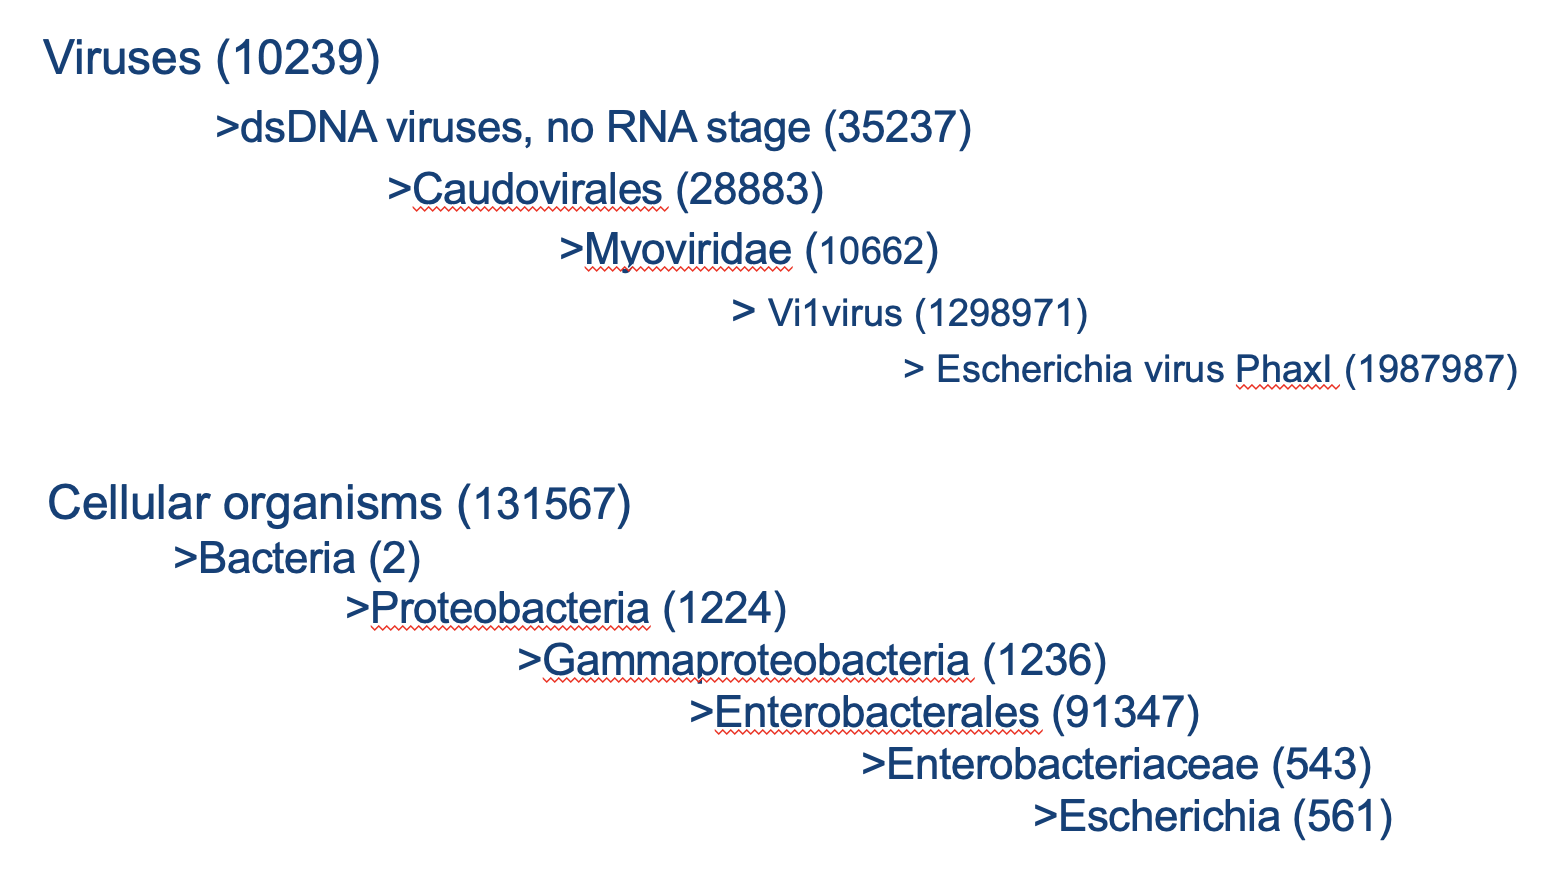

#### 2.5.1 Mapping with BWA
In order to also let Krona show the abundance of an OTU in our sample, we have to **summarize how many reads map back to our assembled scaffolds**. We will do this with `bwa-mem2` which is, just like [bowtie2](#Bowtie), a read mapper. Both do the same job, but in general we can say that `bwa-mem2` is faster.

1. The first step is to **index our scaffolds**. Indexing helps the mapping algorithms to work faster. It is like creating a dictionary of where in the 'genome' to find a particular sequence.

In [ ]:
cd ~/data/meta_tutorial/ASSEMBLY
bwa-mem2 index metatoy.scaffolds.fasta

2. Next, we **map the reads back to the scaffolds** and make a sorted BAM file with the paired and unpaired reads. Finally, we can merge two sorted BAM files into one which will contain all results of the mapping.

In [ ]:
bwa-mem2 mem metatoy.scaffolds.fasta ../READ/TRIMMED/metatoy.NCout.R1.fastq.gz ../READ/TRIMMED/metatoy.NCout.R2.fastq.gz -t 32 | samtools view -Su - | samtools sort - -o metatoy.R.sort.bam
bwa-mem2 mem metatoy.scaffolds.fasta ../READ/TRIMMED/metatoy.NCout.unpaired.fastq.gz -t 32 | samtools view -Su - | samtools sort - -o metatoy.un.sort.bam
samtools merge -f metatoy.bam metatoy.R.sort.bam metatoy.un.sort.bam
rm metatoy.R.sort.bam
rm metatoy.un.sort.bam

3. We index our BAM file and **report the summary statistics** with `samtools idxstats`. The output is tab-delimited with each line consisting of <i>the sequence name, sequence length, # mapped read-segments and # unmapped read-segments</i>. We subsequently cut the first and third column (sequence name and # mapped reads) from this output and paste it into a **'magnitudes' file**. This file thus contains for each scaffold how many reads map to it. 

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 10px;display:inline-block">
    <b><i class="fa fa-info-circle" aria-hidden="true"></i>&nbsp; Info</b><br>
    <p style="color:black">Note: <code>samtools</code> may count reads multiple times if they are mapped more than once or in multiple fragments.</p></div>

In [ ]:
samtools index metatoy.bam
samtools idxstats metatoy.bam | cut -f1,3 > metatoy.magnitudes
cp metatoy.magnitudes ../DIAMOND

#### 2.5.2 Visualization with Krona
We installed KronaTools and symlinked the necessary databases in [Part 1](#Part-1:-Preparation) of this tutorial. We can now use it to build a pie chart which will contain information such as: 
* the classification of each scaffold bundled in an OTU
* OTU abundance in the sample, 
* average log<sub>10</sub> e-value for each OTU, 
* links to the <a href="https://www.ncbi.nlm.nih.gov/taxonomy" target="_blank">Taxonomy browser</a>, 
* etc.

The input we have to give `ktImportBLAST` is our `m8` file with the output of DIAMOND and optionally our magnitudes file. The command is build like this:<br>
<code class="lang-bash" style="background-color:#EEEEEE">ktImportBLAST -o <span class="hljs-attribute">&lt;output&gt;</span> <span class="hljs-attribute">&lt;blast_output_1(m8)&gt;</span>:<span class="hljs-attribute">&lt;magnitudes_file_1,&lt;name_in_kronachart1&gt;</span> <span class="hljs-attribute">&lt;blast_output_2(m8)&gt;</span>:<span class="hljs-attribute">&lt;magnitudes_file_2,&lt;name_in_kronachart2&gt;</span> ...</code>

Thus, following command will give us two pie charts in the same html output:

In [ ]:
cd ~/data/meta_tutorial/DIAMOND
ktImportBLAST -o metatoy.html metatoy.m8,metatoy metatoy.m8:metatoy.magnitudes,metatoy.magn

1. `metatoy.m8,metatoy`: A pie chart of OTU's without taking into account the magnitudes
2. `metatoy.m8:metatoy.magnitudes,metatoy.magn`: Pie chart which proportionally shows how many reads map back to each OTU

You can now <b>transfer the HTML file to your local computer</b> with Filezilla and have a look at it.<br>
**Example:**
<div>
<center><img src="https://github.com/Matthijnssenslab/tutorial_images/blob/main/krona.png?raw=true" height="80%" width="80%"></center>
</div>

#### 2.5.3 Output classification
We can output the classification of each scaffold into a file with `ktClassifyBLAST` of the KronaTools package. Together with the magnitudes, this will allows later on to make abundance and taxonomy tables for further analysis.

The next command will output a tab-delimited file with the scaffold name, taxid and the e-value:

In [ ]:
ktClassifyBLAST metatoy.m8 -o metatoy.tab

With some `awk` ✨<span style="font-weight:bold;color:#ff00ff">m</span><span style="font-weight:bold;color:#ff0000">a</span><span style="font-weight:bold;color:#ff6600">g</span><span style="font-weight:bold;color:#ff9900">i</span><span style="font-weight:bold;color:#ffcc00">c</span>✨, we can print the magnitudes for each scaffold to the '.tab' file containing the classification.

In [ ]:
awk 'NR==FNR { a[$1]=$2; next} $1 in a {print $0,"\t"a[$1]}' metatoy.magnitudes metatoy.tab > metatoy.magnitudes.tab

<div class="alert alert-block alert-info" style="color:#4195A4;background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-info-circle"  aria-hidden="true"></i>&nbsp; Explanation attempt of the <code>awk</code> line</b><br>
    <p style="color: black"><br>
By default, <code>awk</code> considers a field to be a string of characters surrounded by whitespace, the start of a line or the end of a line. Fields are identified by a dollar sign (&#36;) and a number. So, <code>&#36;1</code> represents the first field of a file, <code>&#36;2</code> the second field and so on.. <code>&#36;0</code> represents the whole line.</p>

<ol style="color: black">
    <li><code>awk 'NR == FNR { #some actions; next} #other condition {#other actions}' file1.txt file2.txt</code><br>
When processing more than one file, awk reads each file sequentially, one after another, in the order they are specified on the command line. The special variable <code>NR</code> stores the total number of input records read so far, regardless of how many files have been read. The value of NR starts at 1 and always increases until the program terminates. Another variable, <code>FNR</code>, stores the number of records read <i>from the current file being processed</i>. The value of FNR starts at 1, increases until the end of the current file is reached, then is set again to 1 as soon as the first line of the next file is read, and so on. So, the condition <code>NR == FNR</code> is only true while awk is reading the first file. Thus, in the program above, the actions indicated by <code>#some actions</code> are executed when awk is reading the first file; the actions indicated by <code>#other actions</code> are executed when awk is reading the second file, if the condition in <code>#other condition</code> is met. The <code>next</code> at the end of the first action block is needed to prevent the condition in <code>#other condition</code> from being evaluated, and the actions in <code>#other actions</code> from being executed, while awk is reading the first file. <br>
A nice visualization of <code>NR==FNR</code> is given <a target="_blank" href="https://www.unix.com/shell-programming-and-scripting/197115-nr-fnr-confusions.html">here</a>. 
<br>
<br>
    So <code>NR==FNR {..}</code> means: while the <b>total record number</b> (NR) is equal to the <b>file record number</b> (FNR of file1), do the following <code>{..}</code><br>
When NR is not equal anymore to FNR this means that we started to read input from file2, which is what we want to avoid. </li>
<br>
    <li><code>a[&#36;1]</code> reads in the first field of file1 and indexes it in array <code>a</code>. With <code>=&#36;2</code> the values of the second field of file1 are assigned to this index</li><br>
    <li>Next, when the condition <code>&#36;1 in a</code> is true (when the same value/string is present in field 1 of file2 and in array a): do <code>{print &#36;0,"\t"a[&#36;1]}</code> which prints the whole line of file2 plus a delimiter tab prior to the value assigned to the index in a. </li>
</ol>
<p style="color: black">
    In our program this means:</p>
    <ul style="color: black">
    <li><code>{ a[&#36;1]=&#36;2; next}</code>: The names of our scaffolds are the first field in <code>metatoy.magnitudes</code> file and the magnitudes (second column in this file) are assigned to them.</li>
    <li><code>&#36;1 in a {print &#36;0,"\t"a[&#36;1]}</code>: When the name of the scaffold is both present in array <code>a</code> and in the <code>ktClassifyBLAST</code> output file (metatoy.tab), print the whole line of this second file and append the magnitudes at the end, preceded by a delimiter tab.</li>
    <li>Store this in a new <code>metatoy.magnitudes.tab</code> file</li>
    </ul>
</div>

<center><img src="https://i.imgflip.com/1vw04r.jpg" /></center>

---
<div class="alert alert-block" style="color:purple;background-color: white; border: 2px solid; padding: 10px">
    <b><i class="fa fa-pencil"></i>&nbsp; Exercise</b><br>
<div style="color:black">
    <a id="part-3-exercise-" style="text-decoration:none;color:black;cursor:default"><h2 id="part-3-exercise-">Part 3: Exercise!</h2></a>
<p>Ask your supervisor for some samples and try to assemble the reads, annotate the scaffolds and make a Krona chart yourself!<br></p>
<p>Remember all steps:</p>
<ol>
<li>Trimming and QC</li>
<li>Decontamination (you will have to assemble the negative controls and index them with <code>bowtie2-build</code>)</li>
<li>Assembly</li>
<li>Annotation</li>
<li>Krona visualization</li>
</ol></div></div>
